# Linear Regression with Gradient Descent

In [11]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [12]:
iris = datasets.load_iris()
data = iris.data

### Implement Model

In [13]:
def compute_mse(Y_pred, Y):
    """
    Returns MSE loss and grads.
    """
    # N for norm
    N = Y_pred.shape[0]
    # error
    errors = Y_pred - Y
    # mse loss
    loss = np.sum(errors**2) / N
    # compute gradients
    gradients = 2*errors/N
    
    return loss, gradients

In [14]:
class LinearRegression:
    
    def __init__(self, 
                 n_iterations = 100_000, 
                 learning_rate=0.0001):
    
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        
    def fit(self, X, Y):

        self.training_losses = []
        # add ones vector
        X = np.insert(X, 0, 1, axis=1)
        # initialize weights
        lim = 1 / np.sqrt(X.shape[1])
        self.w = np.random.uniform(-lim, lim, (X.shape[1],Y.shape[1]))
        
        for i in range(self.n_iterations):
            # predict Y_pred
            Y_pred = X @ self.w

            # apply mse function
            loss, gradient = compute_mse(Y_pred, Y)
            # compute gradient w.r.t parameters
            gradient = X.T@gradient      
            # update the weights using lr and gradient
            self.w -= self.learning_rate * gradient

    def predict(self, X):
        
        # extend X by a column of ones
        X = np.insert(X, 0, 1, axis=1)
        # Predict Y_pred using the weights from fit()
        Y_pred = X.dot(self.w)
        return Y_pred

### Prepare Data

In [16]:
# shuffle the data to get random samples
np.random.shuffle(data)
# split into training and testing set
train, test = data[:100], data[100:]
# sepal length and sepal width are the independent variables (X) -> columns 0,1
X_train, X_test = train[:, :2], test[:, :2]
# petal length and petal width are the dependent variables (Y) -> columns 2,3
Y_train, Y_test = train[:,2:], test[:,2:]

### Train Model on Train data

In [17]:
model = LinearRegression(n_iterations=100_000, learning_rate=0.0001)

In [18]:
model.fit(X_train, Y_train)

### Predict with Test data

In [19]:
Y_pred = model.predict(X_test)

### Plot Results

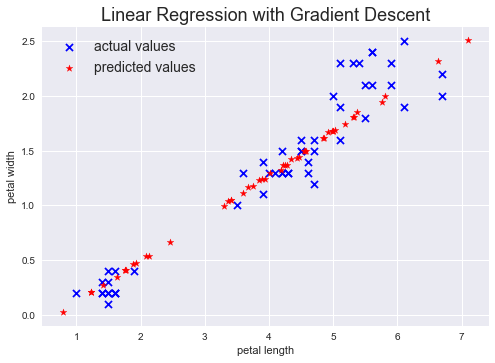

In [20]:
x,y = Y_test[:,0],Y_test[:,1]
plt.scatter(x,y, c='blue', label='actual values', marker='x', s=50)
# plot predicted values
x1,y1 = Y_pred[:,0],Y_pred[:,1]
plt.scatter(x1,y1, c='r', label='predicted values', marker='*', s=50)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Linear Regression with Gradient Descent', fontsize=18)
plt.legend(fontsize=14)
plt.show()